<a href="https://colab.research.google.com/github/williammcintosh/machine_learning_projects/blob/main/McIntosh_NLP_Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Assignment 4

## Author

Will McIntosh

# Goal

The primary purpose of this notebook is to preprocess the [Tweet Sentiment Multilingual dataset](https://huggingface.co/datasets/cardiffnlp/tweet_sentiment_multilingual) from HuggingFace so that it can be entered into two different LLM's: ChatGPT4 and HuggingChat to see how to properly descritize sentiment in mulitple langages.

# Imports

## Libraries

In [1]:
%%capture
import pandas as pd
import os
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Downloads prompt responses from my Google Drive
!pip install --upgrade --no-cache-dir gdown
!gdown 1sSQLMVzW_3vE6uSPwwYNDdLMzCFySIb2 # gpt prompt3
!gdown 1ykT1t83mB1OMFzitnUEE1roxuKfLgZHA # gpt prompt4
!gdown 1N0dxRk0iPt4imBMocvPUu_ownkifln5s # gpt prompt5
!gdown 1BOFUygT5k7d8LIhdAysTUgCrIYkfaMyD # gpt prompt6
!gdown 1E-S9u9HxRvPTGBlFk05IZpepgeUPVCTK # gpt prompt7
!gdown 1KYC4J80uvOgIia9WqnsnI_wezbpkik7S # hug prompt5
!gdown 10ilTZRn62Y8LxAcf3m_aSSExB2pqSnTy # hug prompt6
!gdown 19IGSjh1n8lnbZc2glNKpdhVU_MSj3lVA # hug prompt7
gpt_prompt3_df = pd.read_json("/content/gpt_prompt3.json")
gpt_prompt4_df = pd.read_json("/content/gpt_prompt4.json")
gpt_prompt5_df = pd.read_json("/content/gpt_prompt5.json")
gpt_prompt6_df = pd.read_json("/content/gpt_prompt6.json")
gpt_prompt7_df = pd.read_json("/content/gpt_prompt7.json")
hug_prompt5_df = pd.read_json("/content/hug_prompt5.json")
hug_prompt6_df = pd.read_json("/content/hug_prompt6.json")
hug_prompt7_df = pd.read_json("/content/hug_prompt7.json")

# downloads sampled dataset
!gdown 1A1LI8ePUsJL9u8vGf9Yzq0axw43i5g1l
sampled_tweets_df = pd.read_csv("/content/sampled_tweets_df.csv")

responses_contingent = {
    "gpt prompt 3": gpt_prompt3_df,
    "gpt prompt 4": gpt_prompt4_df,
    "gpt prompt 5": gpt_prompt5_df,
    "hug prompt 5": hug_prompt5_df
}
responses_randomized = {
    "gpt prompt 6": gpt_prompt6_df,
    "gpt prompt 7": gpt_prompt7_df,
    "hug prompt 6": hug_prompt6_df,
    "hug prompt 7": hug_prompt7_df
}

# List of languages
languages = ["arabic", "english", "french", "german", "hindi", "italian", "portuguese", "spanish"]

In [2]:
def plot_correct_list(labels, predictions):
    colors = ['green' if labels[i] == predictions[i] else 'red' for i in range(len(labels))]
    plt.figure(figsize=(10, 1))
    plt.scatter(range(len(colors)), [0]*len(colors), color=colors, marker='o')
    plt.title("Prediction Correctness")
    plt.xlabel("Index")
    plt.yticks([])  # Removing Y axis ticks
    plt.ylim(-0.5, 0.5)  # Minimal Y axis limits for visualization
    plt.grid(False)  # Removing the grid for clarity

    plt.show()

In [3]:
def get_contingent_f1_results_df(models, languages):
    results_df = pd.DataFrame(index=models.keys(), columns=languages)
    for model_name, model_df in models.items():
        for language in languages:
            true_labels = tweets_dict[language]['label'].iloc[0:50]
            predicted_labels = model_df[language].iloc[0:50]
            f1 = f1_score(true_labels, predicted_labels)
            results_df.at[model_name, language] = f1
    return results_df

def get_randomized_f1_results_df(models, languages):
    results_df = pd.DataFrame(index=models.keys(), columns=languages)
    for model_name, model_df in models.items():
        for language in languages:
            true_labels = sampled_tweets_df[sampled_tweets_df['language'] == language]['label'].iloc[0:50]
            predicted_labels = model_df[language].iloc[0:50]
            f1 = f1_score(true_labels, predicted_labels)
            results_df.at[model_name, language] = f1
    return results_df

In [4]:
def results_heatmap(results_df, dataset_type):
    results_df = results_df.astype(float)
    plt.figure(figsize=(10, 4))  # Adjust the size as needed
    ax = sns.heatmap(results_df, annot=True, cmap='viridis', fmt=".2f")
    plt.title(f'{dataset_type} F1 Scores for Sentiment Analysis across Languages')
    plt.xlabel('Languages')
    plt.ylabel('Models')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.show()

In [5]:
def download_and_read_data(language):
    url = f"https://huggingface.co/datasets/cardiffnlp/tweet_sentiment_multilingual/resolve/main/data/{language}/test.jsonl?download=true"
    filename = f"{language}_test.jsonl"
    os.system(f"wget '{url}' -O {filename}")
    df = pd.read_json(filename, lines=True)
    df_filtered = df[df['label'].isin([0, 2])].copy()
    df_filtered.loc[:, 'label'] = df_filtered['label'].map({0: 0, 2: 1})
    df_filtered.reset_index(drop=True, inplace=True)
    return df_filtered



# Dictionary to hold the dataframes
tweets_dict = {}

# Download and read data for each language
for language in languages:
    tweets_dict[language] = download_and_read_data(language)

In [23]:
tweets_dict['hindi'].head()

,text,label
0,CONGRESS na ye party kabhi bani hoti na india ...,0
1,ha ha ha ha ha ha ha . . . . . :d ye mast ...,1
2,kejariwal tum apana soch ka dayra badho ab is ...,0
3,jai hind,1
4,result me konsa bc univrsty tope mari ... jo i...,0


# Data Prep

Get the first 50 tweets for each prompt and only the "text" column so that I don't accidentally aim the mLLMs' prediction.

In [29]:
tweets_dict['spanish']['text'].iloc[0:10].to_csv()

',text\n0,"@user jajajaja dale, hacete la boluda vos jajaja igual a vos nunca se te puede tomar en serio te mando un abrazo desde Perú!"\n1,@user MAAAAE RAJADO! Pero lo bueno es q uno se va independizando!y logrando metas\n2,Bueno hoy fui a almorzar a Nanay con otras 3 dras xq la capacitación mal organizada no nos dió almuerzo y encima nos mandan a comer 2pm\n3,@user ¡Hola Tomás! ¿Habéis visto los nuevos #dinos de #TierraMagna? Es normal que haya colas antes de que comience el espectáculo\n4,@user la hijueputa tela se me salió. yo quería volver a quedar acostada.\n5,@user pues no está nada mal\n6,"@user quizá para profesionales no sea mucho,pero hay no remunerados principalmente femenino para quienes es un sueño, pasa en mi país"\n7,Hora de seguir soñando muy bonito\n8,Me estoy muriendo. Ojalá mi jefa me haga trabajar viernes y sábado en la mañana. Porque cerrar va a ser fatal\n9,"La felicidad tiene un nombr #Tailandia  Si es tu PRIMERA VEZ, apunta estos #consejos!   http http"\n'

# Prompts

## Prompt 1

> "I have a list of strings that I am providing you in the form of a csv. Please give me back a list of numbers of how you deduce their sentiment. 0 as negative and 1 as positive. Please only provide your response in the form of a list in python, like this:
`[0,1,0,1,0]`
All I need from you is your prediction of the sentiments. Do not re-write the tweets back to me in your response, just respond with the list of integers."

The issue is that both models' responses had incorrect lengths, as seen below.

In [8]:
gpt_english_preds = [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0]
hug_english_preds = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

print(len(gpt_english_preds))
print(len(hug_english_preds))

26
24


## Prompt 2

Because of the incorrect lengths of the responses, my second prompt asked for both the tweets back and their corresponding sentiment scores:

> "I have a list of strings that I am providing you in the form of a csv. Please give me back a list of numbers of how you deduce their sentiment. 0 as negative and 1 as positive. *Please provide your response in the form of a json encased by three backticks with the columns "text" and "label".*

## Prompt 3

I found that ChatGPT wouldn't complete the analysis, but would "analyze" and then crash. Only succeeding one out of four or five times. I created a new prompt:

> I have provided a CSV file with a list of tweets. For each tweet, please analyze its sentiment and assign a value: 0 for negative sentiment and 1 for positive sentiment. *Please do not summarize the tweets or write any code for analysis.* Simply read each tweet and assign the sentiment value based on your understanding. I would like the output in a JSON or markdown format, with each tweet indexed and its corresponding sentiment value. I need a sentiment score of 0 or 1 not a summarization or translation of the tweets, just the score of the sentiment of each tweet. No explanations. Just the indexes and integers.



## Prompt 4

HuggingChat had a hard time with Arabic and totally ignored the sentiment analysis. When I asked the same prompt above in english for non-english languages and provided 50 tweets it would respond back with things like:

> ```
It seems like you have provided a JSON object that contains
various properties and values, including some in Arabic
language. Here's a breakdown of the contents of the JSON
object:
```

or

> ```
It seems like you're trying to represent Arabic text in a
JSON format, but the encoding is not correct. The Unicode
characters are being represented as escaped hexadecimal
codes, which is not a valid way to encode Unicode
characters in JSON.
```

I will try again with a new format which will simply be translating the prompts into the intended language. This didn't provide much improvement in the French or Hindi languages so I stuck with prompt3 for GPT.

## Prompt 5

As we can see from the plot below with the French dataset (which I used as an example because it got a low F1-score), GPT is clustering it's incorrect sentiment predictions:

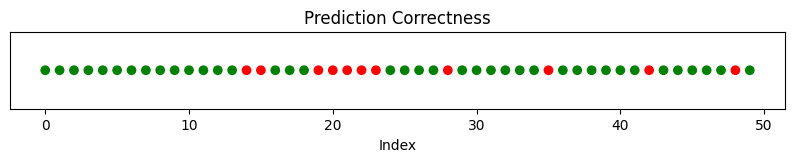

In [9]:
plot_correct_list(
    gpt_prompt3_df['french'].to_list(),
    tweets_dict['french']['label'].iloc[0:50].to_list()
)

Because of this, I went ahead and created a new prompt which instructs GPT to re-read the prompt after every time it determines the sentiment for a tweet:

> I have a list of strings that I am providing you in the form of a csv. Please give me back a list of numbers with their mathcing texts indexes of how you deduce their sentiment, 0 as negative and 1 as positive. Please do not write python code to analyze or any code at all, just read the tweets and decide whether they are positive (1) or negative (0). Please provide your response in either a json format. Please re-read this prompt after determining the sentiment for each tweet. I expect you to read this prompt, read a tweet, determine its sentiment, read the prompt again, read the next tweet in the list and determine its sentiment and so on. Just the index and the sentiment scores like this:
{ "0" : 0, "1" : 1, "2" : 0, "3" : 1, "4" : 0 }


# Re-Working Assignment

The HuggingChat model would often get perfect results:

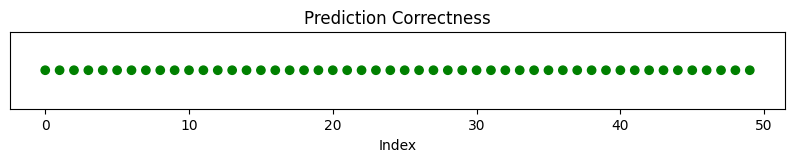

In [10]:
plot_correct_list(
    hug_prompt5_df['german'].to_list(),
    tweets_dict['german']['label'].iloc[0:50].to_list()
)

The original dataset dispersed their labels contiguously, precisely starting with a "0" and then proceeding with a "1" and iterating back and forth throughout the list.

![image](https://drive.google.com/uc?export=view&id=1YEwnei2i4OhMvf2K5K9K8NCBCTS7oAlR)

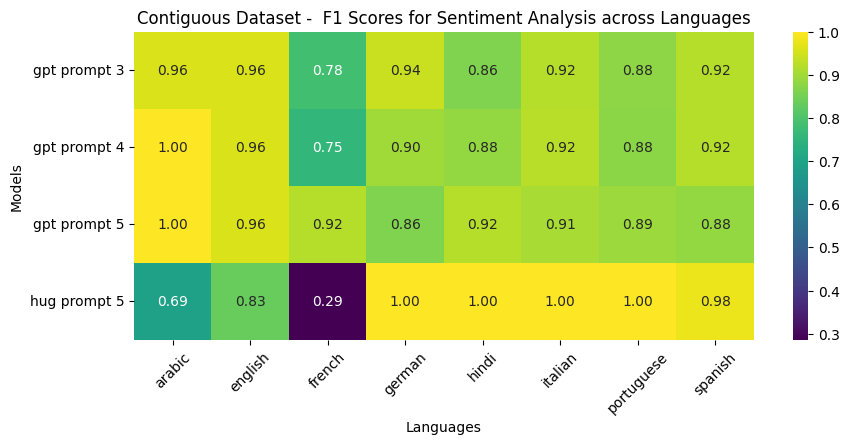

In [11]:
results_df = get_contingent_f1_results_df(responses_contingent, languages)
results_heatmap(results_df, "Contiguous Dataset - ")

The perfect 100% f1-scores caused me to realize there was a need to randomily sample from the datasets instead of selecting the first contiguous examples in order to truly get a sense of the results of these models. The models might have been predicting the 0-1-0-1-0 pattern and not providing sentiment analysis. This set me back, but frankly I should have thought of it before starting this assignment. Each of the prompts will come after the list of tweets to keep it consistent across both models because of the challenges presented by HuggingChat (see explanation below).

I also decided to organize the two different types of prompts for each AI model and they will be as follows for each AI chatbot:

* Prompt 6 - English version of prompt 5 using random sample of data
* Prompt 7 - Translated version of prompt 5 using random sample of data

In [22]:
sampled_tweets_df[sampled_tweets_df['language'] == 'portuguese'].head().reset_index(drop=True)

,text,label,language
0,Melhor programa da tarde 👏 #VideoShowAoVivo,1,portuguese
1,eu acho Débora muito linda #MasterChefBr,1,portuguese
2,Erraram a letra omg 😬 #encontro,0,portuguese
3,"Ai, odeio sardinha. #MasterChefBR",0,portuguese
4,NÃO GOSTO DE PAGODE💤💤💤💤💤💤 #Encontro,0,portuguese


In [30]:
import numpy as np
language = 'spanish'
start = 0
end = 10
sub = sampled_tweets_df[sampled_tweets_df['language'] == language]['text'].iloc[start:end].reset_index(drop=True)
sub.index = np.arange(start, end)
sub.to_csv()

',text\n0,"@user nada peor que tu stalker sea tu colega. Orden de restricción, nomás"\n1,Empieza la temporada 12 de cuarto milenio. Nuevos misterios interesantes....  @user @user\n2,"¡Eh @user, #GuidettiNoSeVende!   Pero entre nosotros... Si lo vendéis, mandarlo para Valencia eh  #AmuntValencia #HalaCelta"\n3,"#LatinaTeMaltrata achachaaaaay, primero los ""intocables"" de los realities y ahora esto, se dan cuenta quiénes dirigen la Tv Basura?"\n4,"Vale entiendo, no he estado rápido en la bajada, pero hay es donde habría que haber entrado    @ivanovlaguna"\n5,@user @user me he quedado sorprendida!  Me encantan! Y me alegro de lo de Blas\n6,@user tio por esto no te mueras\n7,"@user ay, gracias. Lo malo es que ese es solo para primer viaje. Pero mil gracias igualmente"\n8,"Últimamente, me están siguiendo chicas con perfiles bastante subidos de tono en Instagram. ¿Para cuándo un chico decente?"\n9,Hoy no es un buen día para mi\n'

## Prompt 6

> Above I have a list of strings that I am providing you in the form of a csv. Please give me back a list of numbers with their matching texts indexes of how you deduce their sentiment, 0 as negative and 1 as positive. Please do not write python code to analyze or any code at all, just read the tweets and decide whether they are positive (1) or negative (0). Please provide your response in either a json format. Please re-read this prompt after determining the sentiment for each tweet. I expect you to read this prompt, read a tweet, determine its sentiment, read the prompt again, read the next tweet in the list and determine its sentiment and so on. Just the index and the sentiment scores like this: { "0" : 0, "1" : 1, "2" : 0, "3" : 1, "4" : 0 ... } accordingly, but using the indexing of the original tweets. Explain your reasoning.

In [21]:
pd.concat([sampled_tweets_df[sampled_tweets_df['language'] == lang].head(2) for lang in languages]).iloc[2:14]

,text,label,language
50,Mooreder When Michael Moore picks up your caus...,0,english
51,Kim fatty the third 😂😂😂 @ CSIS | Center for St...,0,english
100,RT @user: capacité totale d' #éolien offshore ...,1,french
101,Réchauffement climatique anthropique et santé ...,0,french
150,RT @user: Geiler neuer Scheiss von meinen UP H...,1,german
151,@user Hohoho. *lacht böse*,0,german
200,slman plzz m apse milna chahti hu....apko ek b...,1,hindi
201,rt psharma2525: rt komalinsaan: gurmeetramrahi...,1,hindi
250,@user @user in bocca al lupo per il concorso 2...,0,italian
251,@user @user @user @user Nel DEF 1 mil. di tagl...,0,italian


## Prompt 7

# Results

## Heatmap

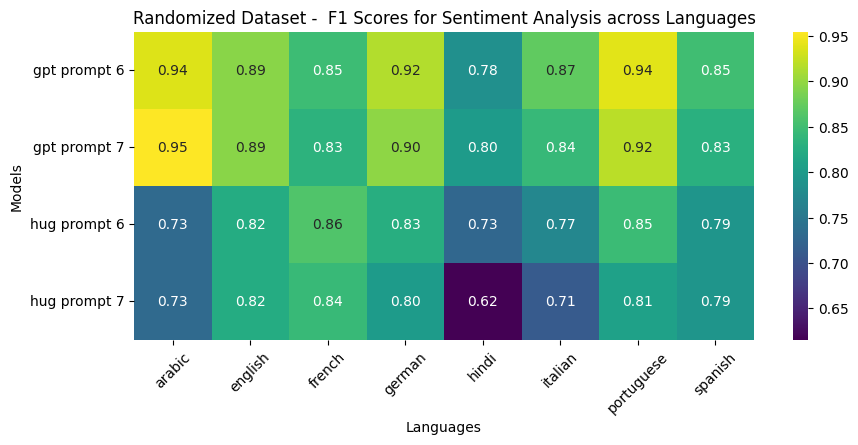

In [15]:
sampled_results_df = get_randomized_f1_results_df(responses_randomized, languages)
results_heatmap(sampled_results_df, "Randomized Dataset - ")

For both ChatGPT and HuggingChat, translating the prompt into the language of the tweets had little effect on the score.

# Model Comparison


## Training Corpi

ChatGPT 4 was trained on the Common Crawl dataset which 46% of documents had English as their primary language followed by German, Russian, Japanese, French, Spanish and Chinese, [all below 6%](https://en.wikipedia.org/wiki/Common_Crawl). GPT was trained on mixed dataset of 300B tokens including
CommonCrawl, WebText2, Books1, Books2, and Wikipedia. LLaMA-2 was trained mixed dataset of
1.4T tokens from CommonCrawl, C4, Github, Wikipedia, books,
arxiv, and StackExchange. HuggingChat is a finetuned model of LlaMA-2 and was on the OASST1 (OpenAssistant Conversations Dataset) which has the following number of documents per language as pertaining to the list of languages above: English: 71956, Spanish: 43061, German: 5279, French: 4251, Portuguese (Brazil): 2969, Italian: 1320, Arabic: 666. 35 languages in total [none of which consist of Hindi](https://huggingface.co/datasets/OpenAssistant/oasst1).

## Model Sizes

When I asked ChatGPT4 it said that it contains 174 billion parameters, but the news website Semafor claimed that they had spoken with "eight people familiar with the inside story" and found that GPT-4 had [1 trillion parameters](https://www.semafor.com/article/03/24/2023/the-secret-history-of-elon-musk-sam-altman-and-openai).  When I asked HuggingChat it said it was fine tuned using a large cluster of NVIDIA V100 GPUs and consists of 65 billion parameters which is close to [LLaMA-2's 70 billion](https://huggingface.co/meta-llama/Llama-2-70b-chat-hf).


## HuggingChat

Across the board HuggingChat did poorly. I get into why below.

### Less Parameters

As described above in comparing the two model, LLaMA-2 and HuggingChat were both models that had 70 billion parameters which since GPT's training data is hidden we are not able to compare directly the two model's parameter count and but we lead to believe that HuggingChat will not have the ability to pick up linguistic nuances like GPT can.

### Multilingual Training

Even though GPT's multilingual training ratios to English were pretty poor, HuggingChat's was even far worse. This is probably why HuggingChat did significantly worse in detecting the sentiment of texts in non english languages compared to ChatGPT in the Heatmap.

### Inference Power

Another thing to consider and possible assume is that HuggingChat doesn't have as much compute power during inference time, which is likely why I had to keep making the tweets into smaller batches in the prompts and put the task prompt at the end. It's safe to assume that GPT has more compute power for inference time and therefore can keep context of 50 tweets while Hugging Chat cannot.

### Working with HugingChat

For analyzing tweet sentiment in Arabic, HuggingChat was absolute garbage. I had to get ChatGPT's help in engineering a prompt for HuggingChat! After dozens of iterations, the only prompt that would actually get it to provide not a summary or translation of the tweets but an actual sentiment analysis was to cut the batch size into no greater than 25, use `prompt 5`, and lastly to put it at the end of the prompt, like this:

In other words:
```
[tweets]
[prompt 5]
```

Even then when it finally output a sentiment analysis it would often just spam the number "1" predicting that all tweets were positive but that was the only way I could get any result at all from HuggingChat in Arabic.

Even with the randomized sample of the dataset, I still couldn't prevent HuggingChat from just spewing out "0,1,0,1,0,1,etc" for Italian and telling HuggingChat to explain it's reasoning. I would have to just keep applying the same prompt over and over, multiple times for each batch until finally HuggingChat would provide actual sentiment and not assuming a pattern. Here's an example:

```
Certo, ecco la lista di numeri con i loro corrispondenti indici di testo e il loro sentimento:

{
"0": 0, // Negativo
"1": 1, // Positivo
"2": 0, // Negativo
"3": 1, // Positivo
"4": 0, // Negativo
"5": 1, // Positivo
"6": 0, // Negativo
"7": 1, // Positivo
"8": 0, // Negativo
"9": 1, // Positivo
"10": 0, // Negativo
```

For the most part, if not in English, HuggingChat was a complete waste time and effort, and very difficult to work with for this particular task.

# Convert ipynb to pdf

1. Runtime → 'Run All' / 'Restart and Run All'
2. Save notebook: File → Save
2. Download: File → Download → 'Download .ipynb'
3. Upload: click the Folder → 'Upload to Session Storage'
4. Run cell block below
4. Once the cell is done running, you'll see a pdf version of the document in the folders panel. Download that.
    * Note - If you don't see the "McIntosh_NLP_Homework4" file, refresh the left panel by clicking the folder by clicking something else like the navicon symbol and the folder again.

In [33]:
%%capture
! pip install nbconvert
! sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
! jupyter nbconvert --to pdf McIntosh_NLP_Homework4.ipynb

For assignment 4, this code block above does not work. It keeps showing random latex errors that are impossible to troubleshoot. This might be related to the multiple languages being present in this notebook.